In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [6]:
scooters20 = pd.read_csv('marseille-trottinettes-2020.csv')

In [7]:
scooters20.head()

,collectiviteNom,collectiviteSiret,annee,semaineNumero,typeEDP,nbEDPdeployes,nbTrajets
0,Ville de Marseille,21130055300016,2020,1,Trottinette électrique,2201,15407
1,Ville de Marseille,21130055300016,2020,2,Trottinette électrique,2072,23775
2,Ville de Marseille,21130055300016,2020,3,Trottinette électrique,1863,21356
3,Ville de Marseille,21130055300016,2020,4,Trottinette électrique,1899,16218
4,Ville de Marseille,21130055300016,2020,5,Trottinette électrique,1993,18122


In [10]:
sns.set_context("poster")

<AxesSubplot:xlabel='semaineNumero', ylabel='nbTrajets'>

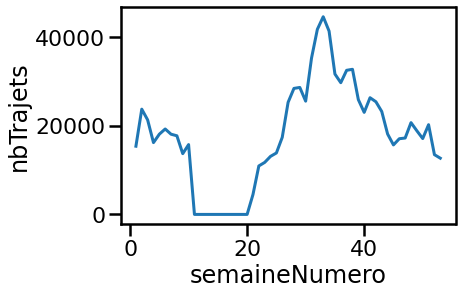

In [18]:
sns.lineplot(data=scooters20, x='semaineNumero', y='nbTrajets', palette='purple')

In [23]:
mini = scooters20[['semaineNumero', 'nbTrajets', 'nbEDPdeployes']]
# df[['C', 'D', 'E']] 

In [24]:
mini.head()

,semaineNumero,nbTrajets,nbEDPdeployes
0,1,15407,2201
1,2,23775,2072
2,3,21356,1863
3,4,16218,1899
4,5,18122,1993


In [25]:
dfm = mini.melt('semaineNumero', var_name='cols', value_name='vals')

In [26]:
dfm

,semaineNumero,cols,vals
0,1,nbTrajets,15407
1,2,nbTrajets,23775
2,3,nbTrajets,21356
3,4,nbTrajets,16218
4,5,nbTrajets,18122
...,...,...,...
101,49,nbEDPdeployes,3029
102,50,nbEDPdeployes,3160
103,51,nbEDPdeployes,3056
104,52,nbEDPdeployes,3084


In [31]:
sns.set(rc={'figure.figsize':(12,8)})

<AxesSubplot:xlabel='semaineNumero', ylabel='vals'>

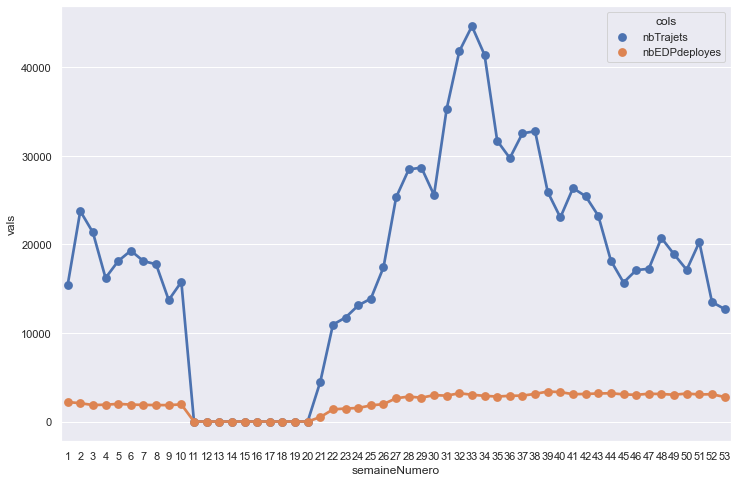

In [32]:
sns.pointplot(x="semaineNumero", y="vals", hue='cols', data=dfm)

It's interesting that the number of rentals stays pretty steady (ignoring the blip from weeks 11 to 20) but the number of journeys is much higher in the summer. I guess in winter people maybe just zip to where they need to go, whereas in summer they'll spend longer on the bike. 
Now I'm going to try to combine data from 2019 and 2021 (there's only a little available for each) 
I'll have to find a way to change the week data, as 2019 and 2021 'week 1' will look the same as 2020. Merge the date and week column? Will that stay in order? I need to think this through - is it even worth doing? Maybe I'm better to compare the years instead 

In [33]:
scooters19 = pd.read_csv('marseille-trottinettes-2019.csv')

In [35]:
scooters19.head(10)

,collectiviteNom,collectiviteSiret,annee,semaineNumero,typeEDP,nbEDPdeployes,nbTrajets
0,Ville de Marseille,21130055300016,2019,44,Trottinette électrique,2 377,26013
1,Ville de Marseille,21130055300016,2019,45,Trottinette électrique,1 869,27624
2,Ville de Marseille,21130055300016,2019,46,Trottinette électrique,1 914,22140
3,Ville de Marseille,21130055300016,2019,47,Trottinette électrique,1 835,18311
4,Ville de Marseille,21130055300016,2019,48,Trottinette électrique,1 895,17907
5,Ville de Marseille,21130055300016,2019,49,Trottinette électrique,2 737,25737
6,Ville de Marseille,21130055300016,2019,50,Trottinette électrique,2 619,22838
7,Ville de Marseille,21130055300016,2019,51,Trottinette électrique,2 558,23013
8,Ville de Marseille,21130055300016,2019,52,Trottinette électrique,2 391,19284


In [45]:
scooters19["YearWeek"] = scooters19["annee"] + scooters19["semaineNumero"]


In [41]:
scooters19.head()

,collectiviteNom,collectiviteSiret,annee,semaineNumero,typeEDP,nbEDPdeployes,nbTrajets,YearWeek
0,Ville de Marseille,21130055300016,2019,44,Trottinette électrique,2 377,26013,2063
1,Ville de Marseille,21130055300016,2019,45,Trottinette électrique,1 869,27624,2064
2,Ville de Marseille,21130055300016,2019,46,Trottinette électrique,1 914,22140,2065
3,Ville de Marseille,21130055300016,2019,47,Trottinette électrique,1 835,18311,2066
4,Ville de Marseille,21130055300016,2019,48,Trottinette électrique,1 895,17907,2067


So, yeah, combining the two numbers adds them together. That's not going to work... What if I add a dash? Nope, didn;t work

In [46]:
scooters19['YearWeek'] = scooters19.annee.astype(str) + scooters19.semaineNumero.astype(str)

In [47]:
scooters19.head()

,collectiviteNom,collectiviteSiret,annee,semaineNumero,typeEDP,nbEDPdeployes,nbTrajets,YearWeek
0,Ville de Marseille,21130055300016,2019,44,Trottinette électrique,2 377,26013,201944
1,Ville de Marseille,21130055300016,2019,45,Trottinette électrique,1 869,27624,201945
2,Ville de Marseille,21130055300016,2019,46,Trottinette électrique,1 914,22140,201946
3,Ville de Marseille,21130055300016,2019,47,Trottinette électrique,1 835,18311,201947
4,Ville de Marseille,21130055300016,2019,48,Trottinette électrique,1 895,17907,201948


yes!

In [48]:
scooters20['YearWeek'] = scooters20.annee.astype(str) + scooters20.semaineNumero.astype(str)

In [49]:
scooters20.head()

,collectiviteNom,collectiviteSiret,annee,semaineNumero,typeEDP,nbEDPdeployes,nbTrajets,YearWeek
0,Ville de Marseille,21130055300016,2020,1,Trottinette électrique,2201,15407,20201
1,Ville de Marseille,21130055300016,2020,2,Trottinette électrique,2072,23775,20202
2,Ville de Marseille,21130055300016,2020,3,Trottinette électrique,1863,21356,20203
3,Ville de Marseille,21130055300016,2020,4,Trottinette électrique,1899,16218,20204
4,Ville de Marseille,21130055300016,2020,5,Trottinette électrique,1993,18122,20205


In [50]:
scooters21 = pd.read_csv('marseille-trottinettes-2021.csv')

In [51]:
scooters21['YearWeek'] = scooters21.annee.astype(str) + scooters21.semaineNumero.astype(str)

In [52]:
scooters21.head()

,collectiviteNom,collectiviteSiret,annee,semaineNumero,typeEDP,nbEDPdeployes,nbTrajets,YearWeek
0,Ville de Marseille,21130055300016,2021,1,Trottinette électrique,2836,15432,20211
1,Ville de Marseille,21130055300016,2021,2,Trottinette électrique,2534,16569,20212
2,Ville de Marseille,21130055300016,2021,3,Trottinette électrique,2629,17286,20213
3,Ville de Marseille,21130055300016,2021,4,Trottinette électrique,2763,18090,20214
4,Ville de Marseille,21130055300016,2021,5,Trottinette électrique,2533,19384,20215


In [54]:
scooters_concat = pd.concat([scooters19, scooters20, scooters21])

In [55]:
scooters_concat.head()

,collectiviteNom,collectiviteSiret,annee,semaineNumero,typeEDP,nbEDPdeployes,nbTrajets,YearWeek
0,Ville de Marseille,21130055300016,2019,44,Trottinette électrique,2 377,26013,201944
1,Ville de Marseille,21130055300016,2019,45,Trottinette électrique,1 869,27624,201945
2,Ville de Marseille,21130055300016,2019,46,Trottinette électrique,1 914,22140,201946
3,Ville de Marseille,21130055300016,2019,47,Trottinette électrique,1 835,18311,201947
4,Ville de Marseille,21130055300016,2019,48,Trottinette électrique,1 895,17907,201948


In [56]:
scooters_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 21
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   collectiviteNom    84 non-null     object
 1   collectiviteSiret  84 non-null     int64 
 2   annee              84 non-null     int64 
 3   semaineNumero      84 non-null     int64 
 4   typeEDP            84 non-null     object
 5   nbEDPdeployes      84 non-null     object
 6   nbTrajets          84 non-null     int64 
 7   YearWeek           84 non-null     object
dtypes: int64(4), object(4)
memory usage: 5.9+ KB


84 - looks like it worked. Now, a graph... the numbers on the x axis are going to be squished. Okay, I need to swivel the numbers first, then pointplot
Drat, it's saying my numbers aren't ints. I changed YearWeek - but the others?

In [57]:
mini_concat = scooters_concat[['YearWeek', 'nbTrajets', 'nbEDPdeployes']]

In [58]:
swivel_concat = mini_concat.melt('YearWeek', var_name='cols', value_name='vals')


In [66]:
swivel_concat['YearWeek'] = swivel_concat['YearWeek'].astype('int')

In [67]:
swivel_concat.head()

,YearWeek,cols,vals
0,201944,nbTrajets,26013
1,201945,nbTrajets,27624
2,201946,nbTrajets,22140
3,201947,nbTrajets,18311
4,201948,nbTrajets,17907


In [59]:
sns.set(rc={'figure.figsize':(15,8)})

<AxesSubplot:xlabel='YearWeek', ylabel='vals'>

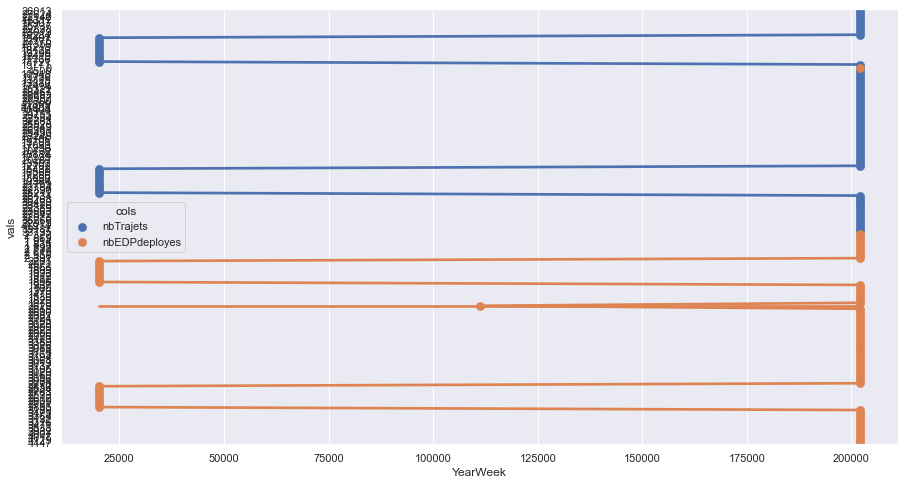

In [68]:
sns.pointplot(x="YearWeek", y="vals", hue='cols', data=swivel_concat)

ha. That's not quite what I was hoping for! What went wrong...?
Okay, the x axis is because the numbers are so large now, i knew that would be a bit strange. But the rest?